### Name : Anushka Kamath
### Github Username : anushkakamath
### USC email id : arkamath@usc.edu
### USC ID : 9418501008

In [41]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import os
import shutil
import glob
!pip install split-folders
import splitfolders
import random
import cv2
import glob
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.util import random_noise
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics import precision_recall_fscore_support
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://stackoverflow.com/questions/49186905/loading-images-in-google-colab. 

https://stackoverflow.com/questions/53074712/. 
https://pypi.org/project/split-folders/ 
 
https://www.learndatasci.com/tutorials/convolutional-neural-networks-image-classification/. 

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator.   

https://keras.io/api/preprocessing/image/.   

https://stackoverflow.com/questions/50133385/preprocessing-images-generated-using-keras-function-imagedatagenerator-to-trai. 


In [12]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/images'

In [13]:
target_names = [item for item in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, item))]
#target_names

https://piazza.com/class/l7149q4oxue34e/post/2023 
 
https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified

In [16]:
output = '/content/drive/MyDrive/Colab Notebooks/Data/'+'output/'
splitfolders.ratio(data_dir, output=output, ratio=(0.715, 0.16, 0.125)) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 6 files [00:00, 57.04 files/s]
Copying files: 16 files [00:00, 78.62 files/s]
Copying files: 24 files [00:00, 72.42 files/s]
Copying files: 33 files [00:00, 78.75 files/s]
Copying files: 42 files [00:00, 80.86 files/s]
Copying files: 51 files [00:00, 83.68 files/s]
Copying files: 60 files [00:00, 78.58 files/s]
Copying files: 69 files [00:00, 80.49 files/s]
Copying files: 80 files [00:00, 85.41 files/s]
Copying files: 93 files [00:01, 96.59 files/s]
Copying files: 104 files [00:01, 99.82 files/s]
Copying files: 115 files [00:01, 95.66 files/s]
Copying files: 126 files [00:01, 99.05 files/s]
Copying files: 136 files [00:01, 99.25 files/s]
Copying files: 146 files [00:01, 97.58 files/s]
Copying files: 157 files [00:01, 100.27 files/s]
Copying files: 168 files [00:01, 100.47 files/s]
Copying files: 179 files [00:01, 99.89 files/s] 
Copying files: 190 files [00:02, 102.53 files/s]
Copying files: 201 files [00:02, 103.17 files/s]
Cop

#VGG16 Implementation

https://keras.io/api/data_loading/

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator. 

https://keras.io/api/data_loading/image/

https://datascience.stackexchange.com/questions/65979/what-is-the-correct-way-to-call-keras-flow-from-directory-method. 

https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/


https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

https://towardsdatascience.com/transfer-learning-for-image-classification-using-keras-c47ccf09c8c8. 

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4 

In [29]:
output = '/content/drive/MyDrive/Colab Notebooks/Data/'+'output/'

train_generator = ImageDataGenerator(rotation_range=10, 
                                      width_shift_range=0.2, 
                                      height_shift_range=0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip=True, 
                                      vertical_flip=True, 
                                      preprocessing_function=preprocess_input
                                     )
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_ds = train_generator.flow_from_directory(output + 'train/',
                                                        target_size=(256, 256),
                                                        class_mode='categorical',
                                                        batch_size=5, 
                                                        shuffle=True,
                                                        seed=42)
valid_ds = val_generator.flow_from_directory(output + 'val/',
                                                        target_size=(256, 256),
                                                        class_mode='categorical',
                                                        batch_size=5, 
                                                        shuffle=True,
                                                        seed=42)
test_ds = test_generator.flow_from_directory(output + 'test/',
                                                        target_size=(256, 256),
                                                        class_mode='categorical',
                                                        batch_size=5, 
                                                        shuffle=False,
                                                        seed=42)

Found 827 images belonging to 20 classes.
Found 178 images belonging to 20 classes.
Found 171 images belonging to 20 classes.


In [30]:
n_epochs = 50
file_path = 'vgg-model.best-weights.hdf5'

base_model = VGG16(weights="imagenet", include_top=False)
for layers in base_model.layers:
  layers.trainable = False
top_model = base_model.layers[-1].output

vgg_model = GlobalAveragePooling2D()(top_model)
vgg_model = Dense(1024, activation='relu')(vgg_model)
vgg_model = BatchNormalization()(vgg_model)
vgg_model = Dropout(0.2)(vgg_model)
vgg_model = Dense(20, activation='softmax')(vgg_model)

vgg_model_16 = Model(base_model.input, vgg_model)
vgg_model_16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

checkpoint = ModelCheckpoint(filepath=file_path, save_best_only=True, verbose=1, monitor = 'val_acc', mode='max')
early_stop = EarlyStopping(monitor='loss', patience=5)
vgg_history = vgg_model_16.fit(train_ds, epochs=n_epochs,
                        validation_data=valid_ds,
                        callbacks=[checkpoint, early_stop],
                        verbose=1)

Epoch 1/50
166/166 [==============================] - ETA: 0s - loss: 1.9261 - acc: 0.4631
Epoch 1: val_acc improved from -inf to 0.74719, saving model to vgg-model.best-weights.hdf5
166/166 [==============================] - 23s 129ms/step - loss: 1.9261 - acc: 0.4631 - val_loss: 0.8060 - val_acc: 0.7472
Epoch 2/50
166/166 [==============================] - ETA: 0s - loss: 1.0607 - acc: 0.6929
Epoch 2: val_acc did not improve from 0.74719
166/166 [==============================] - 20s 122ms/step - loss: 1.0607 - acc: 0.6929 - val_loss: 0.7631 - val_acc: 0.7472
Epoch 3/50
166/166 [==============================] - ETA: 0s - loss: 0.9061 - acc: 0.7207
Epoch 3: val_acc improved from 0.74719 to 0.78652, saving model to vgg-model.best-weights.hdf5
166/166 [==============================] - 20s 123ms/step - loss: 0.9061 - acc: 0.7207 - val_loss: 0.7700 - val_acc: 0.7865
Epoch 4/50
166/166 [==============================] - ETA: 0s - loss: 0.7557 - acc: 0.7751
Epoch 4: val_acc improved from 

https://stackoverflow.com/questions/59813944/how-to-plot-training-error-and-validation-error-vs-number-of-epochs. 

https://stackoverflow.com/questions/54749649/how-to-plot-epoch-vs-val-acc-and-epoch-vs-val-loss-graph-in-cnn. 


FOR VGG16 MODEL


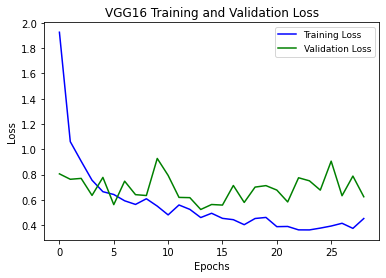

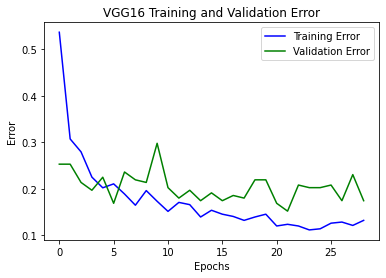

In [39]:
acc = vgg_history.history['acc']
val_acc = vgg_history.history['val_acc']
error = [1 - a for a in acc]
val_error = [1 - a for a in val_acc]
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']
epochs = range(len(acc))

print("FOR VGG16 MODEL")
x = np.array(epochs)
y = np.array(loss)
plt.plot(x, y, 'b-', label = 'Training Loss')
x1 = np.array(epochs)
y1 = np.array(val_loss)
plt.plot(x1, y1, 'g-', label = 'Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.legend(loc = 'upper right', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

x = np.array(epochs)
y = np.array(error)
plt.plot(x, y, 'b-', label = 'Training Error')
x1 = np.array(epochs)
y1 = np.array(val_error)
plt.plot(x1, y1, 'g-', label = 'Validation Error')
plt.title('VGG16 Training and Validation Error')
plt.legend(loc = 'upper right')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

https://www.activestate.com/resources/quick-reads/how-to-use-a-model-to-do-predictions-with-keras/

In [35]:
vgg_model_16.load_weights('vgg-model.best-weights.hdf5') 
pred = vgg_model_16.predict(test_ds)
pred_label = pred.argmax(axis=-1)
true_label = test_ds.classes

35/35 [==============================] - 2s 60ms/step


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html. 

https://stackoverflow.com/questions/47706099/how-are-the-outputs-of-precision-recall-fscore-support-in-sklearn-ordered. 

https://programtalk.com/python-more-examples/sklearn.metrics.precision_recall_fscore_support/?ipage=2

In [36]:
#FOR VGG
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score, _ = precision_recall_fscore_support(true_label, pred_label, average=None)

for i in range(len(precision)):
    print("Class = ", i)
    print("Precision = ", precision[i])
    print("Recall = ", recall[i])
    print("F1-score = ", f1score[i])
    print(" ----------------------------------  ")

sm = sum(pred_label == true_label) 
accuracy = sm / len(true_label)
print("Accuracy = ", accuracy)

Class =  0
Precision =  0.8
Recall =  0.6666666666666666
F1-score =  0.7272727272727272
 ----------------------------------  
Class =  1
Precision =  0.8181818181818182
Recall =  1.0
F1-score =  0.9
 ----------------------------------  
Class =  2
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  3
Precision =  0.8571428571428571
Recall =  0.75
F1-score =  0.7999999999999999
 ----------------------------------  
Class =  4
Precision =  0.6666666666666666
Recall =  0.6666666666666666
F1-score =  0.6666666666666666
 ----------------------------------  
Class =  5
Precision =  1.0
Recall =  0.7777777777777778
F1-score =  0.8750000000000001
 ----------------------------------  
Class =  6
Precision =  0.9
Recall =  1.0
F1-score =  0.9473684210526316
 ----------------------------------  
Class =  7
Precision =  0.6666666666666666
Recall =  0.8888888888888888
F1-score =  0.761904761904762
 ----------------------------------  
Class =  8
Precision =

#EfficientNetB0 Implementation

https://www.kaggle.com/code/lys620/efficientnet-with-keras. 



In [24]:
output = '/content/drive/MyDrive/Colab Notebooks/Data/'+'output/'

train_generator = ImageDataGenerator(rotation_range=10, 
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=True, 
                                    )
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()


train_ds = train_generator.flow_from_directory(output + 'train/',
                                                        target_size=(256, 256),
                                                        class_mode='categorical',
                                                        batch_size=5, 
                                                        shuffle=True,
                                                        seed=42)
valid_ds = val_generator.flow_from_directory(output + 'val/',
                                                        target_size=(256, 256),
                                                        class_mode='categorical',
                                                        batch_size=5, 
                                                        shuffle=True,
                                                        seed=42)
test_ds = test_generator.flow_from_directory(output + 'test/',
                                                        target_size=(256, 256),
                                                        class_mode='categorical',
                                                        batch_size=5, 
                                                        shuffle=False,
                                                        seed=42)

Found 827 images belonging to 20 classes.
Found 178 images belonging to 20 classes.
Found 171 images belonging to 20 classes.


In [25]:
eff_base_model = EfficientNetB0(include_top=False, weights='imagenet')
file_path = 'effnet.model.best-weights.hdf5'
n_epochs = 50
for layers in eff_base_model.layers:
  layers.trainable = False
output_model = eff_base_model.layers[-1].output

eff_model = GlobalAveragePooling2D()(output_model)
eff_model = Flatten()(eff_model)
eff_model = Dropout(0.2)(eff_model)
eff_model = Dense(300, activation='relu')(eff_model)
eff_model = BatchNormalization()(eff_model)
eff_model = Dense(100, activation='relu')(eff_model)
eff_model = BatchNormalization()(eff_model)
eff_model = Dropout(0.2)(eff_model)
eff_output_layer = Dense(20, activation='softmax')(eff_model)
eff_model_b0 = Model(eff_base_model.input, eff_output_layer)
eff_model_b0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

checkpoint_eff = ModelCheckpoint(filepath=file_path, save_best_only=True, verbose=1, monitor = 'val_acc', mode='max')
early_stop_eff = EarlyStopping(monitor='loss', patience=5)
eff_history = eff_model_b0.fit(train_ds, epochs=n_epochs,
                        validation_data=valid_ds,
                        callbacks=[checkpoint_eff, early_stop_eff],
                        verbose=1)


16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/50
166/166 [==============================] - ETA: 0s - loss: 2.1936 - acc: 0.3700
Epoch 1: val_acc improved from -inf to 0.73596, saving model to effnet.model.best-weights.hdf5
166/166 [==============================] - 28s 132ms/step - loss: 2.1936 - acc: 0.3700 - val_loss: 0.9650 - val_acc: 0.7360
Epoch 2/50
166/166 [==============================] - ETA: 0s - loss: 1.2381 - acc: 0.6300
Epoch 2: val_acc improved from 0.73596 to 0.85393, saving model to effnet.model.best-weights.hdf5
166/166 [==============================] - 21s 125ms/step - loss: 1.2381 - acc: 0.6300 - val_loss: 0.5265 - val_acc: 0.8539
Epoch 3/50
166/166 [==============================] - ETA: 0s - loss: 1.0864 - acc: 0.6530
Epoch 3: val_acc improved from 0.85393 to 0.85955, saving model to effnet.model.best-weights.hdf5
166/166 [==============================] - 22s 133ms/step - loss: 1.0864 - acc: 0.6530 - val_loss: 0.4715 - val_acc: 0.8596

https://stackoverflow.com/questions/59813944/how-to-plot-training-error-and-validation-error-vs-number-of-epochs. 

https://stackoverflow.com/questions/54749649/how-to-plot-epoch-vs-val-acc-and-epoch-vs-val-loss-graph-in-cnn. 


FOR EFFICIENT NET B0 MODEL


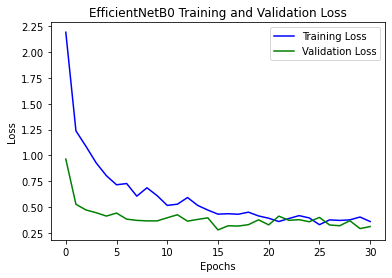

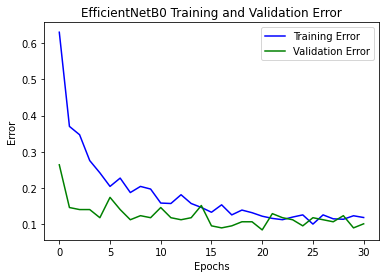

In [38]:
acc = eff_history.history['acc']
val_acc = eff_history.history['val_acc']
error = [1 - a for a in acc]
val_error = [1 - a for a in val_acc]
loss = eff_history.history['loss']
val_loss = eff_history.history['val_loss']
epochs = range(len(acc))

print("FOR EFFICIENT NET B0 MODEL")
x = np.array(epochs)
y = np.array(loss)
plt.plot(x, y, 'b-', label = 'Training Loss')
x1 = np.array(epochs)
y1 = np.array(val_loss)
plt.plot(x1, y1, 'g-', label = 'Validation Loss')
plt.title('EfficientNetB0 Training and Validation Loss')
plt.legend(loc = 'upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

x = np.array(epochs)
y = np.array(error)
plt.plot(x, y, 'b-', label = 'Training Error')
x1 = np.array(epochs)
y1 = np.array(val_error)
plt.plot(x1, y1, 'g-', label = 'Validation Error')
plt.title('EfficientNetB0 Training and Validation Error')
plt.legend(loc = 'upper right')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

https://www.activestate.com/resources/quick-reads/how-to-use-a-model-to-do-predictions-with-keras/

In [27]:
eff_model_b0.load_weights('effnet.model.best-weights.hdf5') 
pred = eff_model_b0.predict(test_ds)
pred_label = pred.argmax(axis=-1)
true_label = test_ds.classes

35/35 [==============================] - 3s 49ms/step


In [28]:
#FOR EfficientNet10
precision, recall, f1score, _ = precision_recall_fscore_support(true_label, pred_label, average=None)

for i in range(len(precision)):
    print("Class = ", i)
    print("Precision = ", precision[i])
    print("Recall = ", recall[i])
    print("F1-score = ", f1score[i])
    print(" ----------------------------------  ")

sm = sum(pred_label == true_label) 
accuracy = sm / len(true_label)
print("Accuracy = ", accuracy)

Class =  0
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  1
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  2
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  3
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  4
Precision =  0.7
Recall =  0.7777777777777778
F1-score =  0.7368421052631577
 ----------------------------------  
Class =  5
Precision =  1.0
Recall =  0.8888888888888888
F1-score =  0.9411764705882353
 ----------------------------------  
Class =  6
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  7
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  8
Precision =  1.0
Recall =  1.0
F1-score =  1.0
 ----------------------------------  
Class =  9
Precision =  1.0
Recall =  0.8888888888888888
F1-score =  0.94117